In [18]:
import warnings
warnings.filterwarnings('ignore')

#### Exploración del efecto de hiperparámetros

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

#### Cargar datos desde el práctico anterior

In [20]:
train_data = pd.read_csv("process_dataset/train_data_scaled_robust.csv")
y_train = np.load("process_dataset/y_train.npy")

##### Hiperparámetros KNN

- **n_neighbors** (`int`): Número de vecinos (default=`5`)

- **weights**: Método para la ponderación de las contribuciones de los vecinos (default=`uniforme`)
  - **Valores**:
    - `uniforme`: Todos los puntos de cada vecindario tienen la misma ponderación.
    - `distancia`: Los vecinos más cercanos a un punto de consulta tendrán mayor influencia que los vecinos más lejanos.
    - `callable`: Función definida por el usuario.

- **algorithm**: Algoritmo utilizado para calcular los vecinos más cercanos (default=`auto`)
  - **Valores**: `{'auto', 'ball_tree', 'kd_tree', 'brute'}`

- **leaf_size** (`int`): Tamaño de hoja que se pasa a `BallTree` o `KDTree` (default=`30`)

- **p** (`int`): Parámetro de potencia para la métrica de Minkowski (default=`2`)
  - **Valores**:
    1. `1`: Distancia Manhattan.
    2. `2`: Distancia Euclideana.
    3. `3`: Distancia Minkowski.

- **metric**: Métrica para calcular la distancia (default=`minkowski`)

- **n_jobs** (`int`): Número de trabajos paralelos para la búsqueda de vecinos (default=`None`)

In [21]:
n_neighbors_values = [2, 3, 5, 7, 9, 11, 15, 20]  # Número de vecinos
weights_values = ['uniform', 'distance']  # Tipo de ponderación
metrics_values = ['euclidean', 'manhattan']  # Tipos de distancia
results = []

for n in n_neighbors_values:
    for weight in weights_values:
        for metric in metrics_values:
            print(f"Entrenando KNN con n_neighbors={n}, weights={weight}, metric={metric}")
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric) # Entrenar modelos
            
            results.append({
                "n_neighbors": n,
                "weights": weight,
                "metric": metric,
                "Accuracy": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="accuracy").mean(),
                "Recall": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="recall").mean(),
                "Precision": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="precision").mean(),
                "F1": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="f1").mean()
            })

results_knn = pd.DataFrame(results)

Entrenando KNN con n_neighbors=2, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=2, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=2, weights=distance, metric=euclidean
Entrenando KNN con n_neighbors=2, weights=distance, metric=manhattan
Entrenando KNN con n_neighbors=3, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=3, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=3, weights=distance, metric=euclidean
Entrenando KNN con n_neighbors=3, weights=distance, metric=manhattan
Entrenando KNN con n_neighbors=5, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=5, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=5, weights=distance, metric=euclidean
Entrenando KNN con n_neighbors=5, weights=distance, metric=manhattan
Entrenando KNN con n_neighbors=7, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=7, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=7, weights=

In [22]:
results_knn

,n_neighbors,weights,metric,Accuracy,Recall,Precision,F1
0,2,uniform,euclidean,0.493805,0.220080,0.467005,0.298681
1,2,uniform,manhattan,0.496460,0.215140,0.474345,0.295689
2,2,distance,euclidean,0.492478,0.473908,0.483160,0.477815
3,2,distance,manhattan,0.499558,0.483812,0.491565,0.487358
4,3,uniform,euclidean,0.489602,0.468505,0.480768,0.474330
5,3,uniform,manhattan,0.496460,0.475243,0.487345,0.480998
6,3,distance,euclidean,0.489381,0.468054,0.480498,0.473961
7,3,distance,manhattan,0.496681,0.476140,0.487548,0.481553
8,5,uniform,euclidean,0.492920,0.467224,0.484266,0.475002
9,5,uniform,manhattan,0.505088,0.486533,0.497215,0.491431


##### Hiperparámetros árboles de decisión

- **criterion**: Función para medir la calidad de una división. (default=`gini`)
    - **valores**: {`gini`, `entropy`, `log_loss`}
- **splitter**: La estrategia utilizada para elegir la división en cada nodo. (default=”best”)
    - **values**: best para elegir la mejor división, “random” para elegir la mejor división aleatoria 
- **max_depthint**, default=None
- **min_samples_split** default=2
- **min_samples_leaf**, default=1
- **min_weight_fraction_leaf** default=0.0
- **max_features** {“sqrt”, “log2”}, default=None
- **random_state** default=None
- **max_leaf_nodes** default=None
- **min_impurity_decrease** default=0.0
- **class_weight** default=None
- **ccp_alphanon-negative**, default=0.0
- **monotonic_cst** default=None

In [23]:
quality_type = ['gini', 'entropy', 'log_loss']
splitter_type = ['best', 'random']  
max_depth_values = [3, 4, 5, 7, 9, 11, 15] 
results = []

for quality in quality_type:
    for splitter in splitter_type:
        for value in max_depth_values:
            print(f"Entrenando DT con criterion={quality}, splitter={splitter}, max_depth={value}")
            dt_model = DecisionTreeClassifier(criterion=quality, splitter=splitter, max_depth=value)

            results.append({
                'criterion': quality,
                'splitter': splitter,
                'max_depth': value,
                "Accuracy": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="accuracy").mean(),
                "Recall": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="recall").mean(),
                "Precision": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="precision").mean(),
                "F1": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="f1").mean()
            })

results_dt = pd.DataFrame(results)

Entrenando DT con criterion=gini, splitter=best, max_depth=3
Entrenando DT con criterion=gini, splitter=best, max_depth=4
Entrenando DT con criterion=gini, splitter=best, max_depth=5
Entrenando DT con criterion=gini, splitter=best, max_depth=7
Entrenando DT con criterion=gini, splitter=best, max_depth=9
Entrenando DT con criterion=gini, splitter=best, max_depth=11
Entrenando DT con criterion=gini, splitter=best, max_depth=15
Entrenando DT con criterion=gini, splitter=random, max_depth=3
Entrenando DT con criterion=gini, splitter=random, max_depth=4
Entrenando DT con criterion=gini, splitter=random, max_depth=5
Entrenando DT con criterion=gini, splitter=random, max_depth=7
Entrenando DT con criterion=gini, splitter=random, max_depth=9
Entrenando DT con criterion=gini, splitter=random, max_depth=11
Entrenando DT con criterion=gini, splitter=random, max_depth=15
Entrenando DT con criterion=entropy, splitter=best, max_depth=3
Entrenando DT con criterion=entropy, splitter=best, max_depth=4


In [24]:
results_dt

,criterion,splitter,max_depth,Accuracy,Recall,Precision,F1
0,gini,best,3,0.493584,0.465865,0.484838,0.474805
1,gini,best,4,0.493584,0.465865,0.484838,0.474805
2,gini,best,5,0.493584,0.465865,0.484838,0.474805
3,gini,best,7,0.493584,0.465865,0.484838,0.474805
4,gini,best,9,0.493584,0.465865,0.484838,0.474805
5,gini,best,11,0.493584,0.465865,0.484838,0.474805
6,gini,best,15,0.493584,0.465865,0.484838,0.474805
7,gini,random,3,0.493584,0.465865,0.484838,0.474805
8,gini,random,4,0.493584,0.465865,0.484838,0.474805
9,gini,random,5,0.493584,0.465865,0.484838,0.474805


##### Hiperparámetros SVM
- C
- kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
- degree, default=3
- gamma{‘scale’, ‘auto’} or float, default=’scale’
- coef0, default=0.0
- shrinking, default=True
- probability, default=False
- tol, default=1e-3
- cache_size, default=200
- class_weight, default=None
- verbose, default=False
- max_iter, default=-1
- decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
- break_ties, default=False
- random_state, default=None

In [25]:
c_values = [3, 4, 5, 7, 9, 11, 15]
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
decision_functions = ['ovo', 'ovr']  
results = []

for c in c_values:
    for kernel in kernels:
        for function in decision_functions:
            print(f"Entrenando SVM con kernel={kernel}, decision_function={function}")
            svm_model = SVC(C=c, kernel=kernel, decision_function_shape=function)
            results.append({
                "C": c,
                "kernel": kernel,
                "decision_function": function,
                "Accuracy": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="accuracy").mean(),
                "Recall": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="recall").mean(),
                "Precision": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="precision").mean(),
                "F1": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="f1").mean()
            })

results_svm = pd.DataFrame(results)

Entrenando SVM con kernel=linear, decision_function=ovo
Entrenando SVM con kernel=linear, decision_function=ovr
Entrenando SVM con kernel=poly, decision_function=ovo
Entrenando SVM con kernel=poly, decision_function=ovr
Entrenando SVM con kernel=rbf, decision_function=ovo
Entrenando SVM con kernel=rbf, decision_function=ovr
Entrenando SVM con kernel=sigmoid, decision_function=ovo
Entrenando SVM con kernel=sigmoid, decision_function=ovr
Entrenando SVM con kernel=precomputed, decision_function=ovo
Entrenando SVM con kernel=precomputed, decision_function=ovr
Entrenando SVM con kernel=linear, decision_function=ovo
Entrenando SVM con kernel=linear, decision_function=ovr
Entrenando SVM con kernel=poly, decision_function=ovo
Entrenando SVM con kernel=poly, decision_function=ovr
Entrenando SVM con kernel=rbf, decision_function=ovo
Entrenando SVM con kernel=rbf, decision_function=ovr
Entrenando SVM con kernel=sigmoid, decision_function=ovo
Entrenando SVM con kernel=sigmoid, decision_function=ov

In [26]:
results_svm

,C,kernel,decision_function,Accuracy,Recall,Precision,F1
0,3,linear,ovo,0.493584,0.465865,0.484838,0.474805
1,3,linear,ovr,0.493584,0.465865,0.484838,0.474805
2,3,poly,ovo,0.493584,0.465865,0.484838,0.474805
3,3,poly,ovr,0.493584,0.465865,0.484838,0.474805
4,3,rbf,ovo,0.493584,0.465865,0.484838,0.474805
...,...,...,...,...,...,...,...
65,15,rbf,ovr,0.493584,0.465865,0.484838,0.474805
66,15,sigmoid,ovo,0.493584,0.465865,0.484838,0.474805
67,15,sigmoid,ovr,0.493584,0.465865,0.484838,0.474805
68,15,precomputed,ovo,0.493584,0.465865,0.484838,0.474805


##### Hiperparámetros AdaBoost
- estimator, default=None
- n_estimators, default=50
- learning_rate, default=1.0
- algorithm{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’
- random_state int, RandomState instance or None, default=None

In [27]:
n_estimators_values = [10, 25, 50, 100, 150, 200]  # Número de estimadores
learning_rate_values = [0.01, 0.1, 0.2]  # Tasa de aprendizaje
algorithms = ['SAMME', 'SAMME.R']
results = []

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        for alg in algorithms:
            print(f"Entrenando AdaBoost con n_estimators={n_estimators}, learning_rate={learning_rate}, algorithm={alg}")
            gb_model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=alg, random_state=42)
            
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'algorithm': alg,
                "Accuracy": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="accuracy").mean(),
                "Recall": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="recall").mean(),
                "Precision": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="precision").mean(),
                "F1": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="f1").mean()
            })

results_ada = pd.DataFrame(results)

Entrenando AdaBoost con n_estimators=10, learning_rate=0.01, algorithm=SAMME
Entrenando AdaBoost con n_estimators=10, learning_rate=0.01, algorithm=SAMME.R
Entrenando AdaBoost con n_estimators=10, learning_rate=0.1, algorithm=SAMME
Entrenando AdaBoost con n_estimators=10, learning_rate=0.1, algorithm=SAMME.R
Entrenando AdaBoost con n_estimators=10, learning_rate=0.2, algorithm=SAMME
Entrenando AdaBoost con n_estimators=10, learning_rate=0.2, algorithm=SAMME.R
Entrenando AdaBoost con n_estimators=25, learning_rate=0.01, algorithm=SAMME
Entrenando AdaBoost con n_estimators=25, learning_rate=0.01, algorithm=SAMME.R
Entrenando AdaBoost con n_estimators=25, learning_rate=0.1, algorithm=SAMME
Entrenando AdaBoost con n_estimators=25, learning_rate=0.1, algorithm=SAMME.R
Entrenando AdaBoost con n_estimators=25, learning_rate=0.2, algorithm=SAMME
Entrenando AdaBoost con n_estimators=25, learning_rate=0.2, algorithm=SAMME.R
Entrenando AdaBoost con n_estimators=50, learning_rate=0.01, algorithm=S

In [28]:
results_ada

,n_estimators,learning_rate,algorithm,Accuracy,Recall,Precision,F1
0,10,0.01,SAMME,0.493584,0.465865,0.484838,0.474805
1,10,0.01,SAMME.R,0.493584,0.465865,0.484838,0.474805
2,10,0.10,SAMME,0.493584,0.465865,0.484838,0.474805
3,10,0.10,SAMME.R,0.493584,0.465865,0.484838,0.474805
4,10,0.20,SAMME,0.493584,0.465865,0.484838,0.474805
5,10,0.20,SAMME.R,0.493584,0.465865,0.484838,0.474805
6,25,0.01,SAMME,0.493584,0.465865,0.484838,0.474805
7,25,0.01,SAMME.R,0.493584,0.465865,0.484838,0.474805
8,25,0.10,SAMME,0.493584,0.465865,0.484838,0.474805
9,25,0.10,SAMME.R,0.493584,0.465865,0.484838,0.474805


##### Hiperparámetros GradientBoosting

- **loss**: Función de pérdida a optimizar (default=`'log_loss'`).
    - **Valores**: {`log_loss`, `exponencial`}. 
        - `log_loss`: Binomial o multinomial. 
        - `exponencial`: la optimización del modelo se comportará de manera similar a AdaBoost
  
- **learning_rate**: Tasa de aprendizaje para actualizar los pesos en cada iteración (default=`0.1`). Contribución de cada nuevo árbol que se añade al modelo

- **n_estimators**: Número de estimadores (árboles) a utilizar (default=`100`).
  
- **subsample**: Fracción de muestras a utilizar para ajustar cada árbol (default=`1.0`).
  
- **criterion**: Criterio para la función de pérdida (default=`'friedman_mse'`).
    - **Valores**: {‘friedman_mse’, ‘squared_error’}
  
- **min_samples_split**: Número mínimo de muestras necesarias para dividir un nodo (default=`2`).
  
- **min_samples_leaf**: Número mínimo de muestras en un nodo hoja (default=`1`).
  
- **min_weight_fraction_leaf**: Fracción mínima de peso requerida en un nodo hoja (default=`0.0`).
  
- **max_depth**: Profundidad máxima de los árboles (default=`3`).
  
- **min_impurity_decrease**: Umbral de disminución de impurezas para dividir un nodo (default=`0.0`).
  
- **init**: Estimador inicial para la predicción (default=`None`).
  
- **random_state** (`int` o `None`): Controla la aleatoriedad del muestreo y del modelo (default=`None`).
  
- **max_features** (`int`, `float`, o `None`): Número de características a considerar para buscar la mejor división (default=`None`).
  
- **verbose**: Controla el nivel de mensajes de salida (default=`0`).
  
- **max_leaf_nodes** (`int` o `None`): Número máximo de nodos hoja (default=`None`).
  
- **warm_start**: Si se deben reutilizar las soluciones anteriores para ajustarlas (default=`False`).
  
- **validation_fraction**: Fracción de muestras utilizadas para la validación en la parada temprana (default=`0.1`).
  
- **n_iter_no_change** (`int` o `None`): Número de iteraciones sin cambio en la validación para detener el entrenamiento (default=`None`).
  
- **tol**: Tolerancia para la parada temprana (default=`0.0001`).
  
- **ccp_alpha**: Parámetro de complejidad para la poda de costo-complejidad (default=`0.0`).


In [29]:
n_estimators_values =  [10, 25, 50, 100, 150, 200] # Número de estimadores
learning_rate_values = [0.01, 0.1, 0.2]  # Tasa de aprendizaje
max_depth_values = [3, 4, 5]  # Profundidad máxima de los árboles
results = []

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        for max_depth in max_depth_values:
            print(f"Entrenando Gradient Boosting con n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}")
            gb_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
            
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                "Accuracy": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="accuracy").mean(),
                "Recall": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="recall").mean(),
                "Precision": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="precision").mean(),
                "F1": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="f1").mean()
            })

results_gbc = pd.DataFrame(results)

Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.01, max_depth=3
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.01, max_depth=4
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.01, max_depth=5
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.1, max_depth=3
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.1, max_depth=4
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.1, max_depth=5
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.2, max_depth=3
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.2, max_depth=4
Entrenando Gradient Boosting con n_estimators=10, learning_rate=0.2, max_depth=5
Entrenando Gradient Boosting con n_estimators=25, learning_rate=0.01, max_depth=3
Entrenando Gradient Boosting con n_estimators=25, learning_rate=0.01, max_depth=4
Entrenando Gradient Boosting con n_estimators=25, learning_rate=0.01, max_depth=5
Entrenando Gradient Bo

In [30]:
results_gbc

,n_estimators,learning_rate,max_depth,Accuracy,Recall,Precision,F1
0,10,0.01,3,0.493584,0.465865,0.484838,0.474805
1,10,0.01,4,0.493584,0.465865,0.484838,0.474805
2,10,0.01,5,0.493584,0.465865,0.484838,0.474805
3,10,0.10,3,0.493584,0.465865,0.484838,0.474805
4,10,0.10,4,0.493584,0.465865,0.484838,0.474805
5,10,0.10,5,0.493584,0.465865,0.484838,0.474805
6,10,0.20,3,0.493584,0.465865,0.484838,0.474805
7,10,0.20,4,0.493584,0.465865,0.484838,0.474805
8,10,0.20,5,0.493584,0.465865,0.484838,0.474805
9,25,0.01,3,0.493584,0.465865,0.484838,0.474805


##### Hiperparámetros ExtraTree
- n_estimators, default=100
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- max_depth, default=None
- min_samples_split, default=2
- min_samples_leaf, default=1
- min_weight_fraction_leaf, default=0.0
- max_features{“sqrt”, “log2”, None} default=”sqrt”
- max_leaf_nodes, default=None
- min_impurity_decrease, default=0.0
- bootstrap, default=False
- oob_score, default=False
- random_state, RandomState instance or None, default=None
- verbose, default=0
- warm_start, default=False
- class_weight{“balanced”, “balanced_subsample”}, default=None
- ccp_alphanon-negative, default=0.0
- max_samples, default=None
- monotonic_cstarray-like, default=None

In [31]:
n_estimators_values = [10, 25, 50, 100, 150, 200]  # Número de estimadores
quality_type = ['gini', 'entropy', 'log_loss']
max_depth_values = [3, 4, 5, 7, 9, 11, 15] 
results = []

for n in n_estimators_values:
    for quality in quality_type:
        for value in max_depth_values:
            print(f"Entrenando ExtraTree con n_estimators={n} criterion={quality}, max_depth={value}")
            et_model = ExtraTreesClassifier(n_estimators=n, criterion=quality, max_depth=value)

            results.append({
                'n_estimators': quality,
                'criterion': splitter,
                'max_depth': value,
                "Accuracy": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="accuracy").mean(),
                "Recall": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="recall").mean(),
                "Precision": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="precision").mean(),
                "F1": cross_val_score(knn_model, train_data, y_train, cv=10, scoring="f1").mean()
            })

results_etc = pd.DataFrame(results)

Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=3
Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=4
Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=5
Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=7
Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=9
Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=11
Entrenando ExtraTree con n_estimators=10 criterion=gini, max_depth=15
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=3
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=4
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=5
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=7
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=9
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=11
Entrenando ExtraTree con n_estimators=10 criterion=entropy, max_depth=15
Entrenand

In [32]:
results_etc

,n_estimators,criterion,max_depth,Accuracy,Recall,Precision,F1
0,gini,random,3,0.493584,0.465865,0.484838,0.474805
1,gini,random,4,0.493584,0.465865,0.484838,0.474805
2,gini,random,5,0.493584,0.465865,0.484838,0.474805
3,gini,random,7,0.493584,0.465865,0.484838,0.474805
4,gini,random,9,0.493584,0.465865,0.484838,0.474805
...,...,...,...,...,...,...,...
121,log_loss,random,5,0.493584,0.465865,0.484838,0.474805
122,log_loss,random,7,0.493584,0.465865,0.484838,0.474805
123,log_loss,random,9,0.493584,0.465865,0.484838,0.474805
124,log_loss,random,11,0.493584,0.465865,0.484838,0.474805


### Análisis de resultados

In [59]:
def graphics(hiperparamether, hue, style, results, name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    sns.lineplot(data=results, x=hiperparamether, y='Accuracy', hue=hue, style=style, palette='pastel', ax=axes[0, 0])
    axes[0, 0].set_title(f'Accuracy en {name}')

    sns.lineplot(data=results, x=hiperparamether, y='Recall', hue=hue, style=style, palette='pastel', ax=axes[0, 1])
    axes[0, 1].set_title(f'Recall en {name}')

    sns.lineplot(data=results, x=hiperparamether, y='Precision', hue=hue, style=style, palette='pastel', ax=axes[1, 0])
    axes[1, 0].set_title(f'Precision en {name}')

    sns.lineplot(data=results, x=hiperparamether, y='F1', hue=hue, style=style, palette='pastel', ax=axes[1, 1])
    axes[1, 1].set_title(f'F1 en {name}')
    plt.tight_layout()
    plt.show()


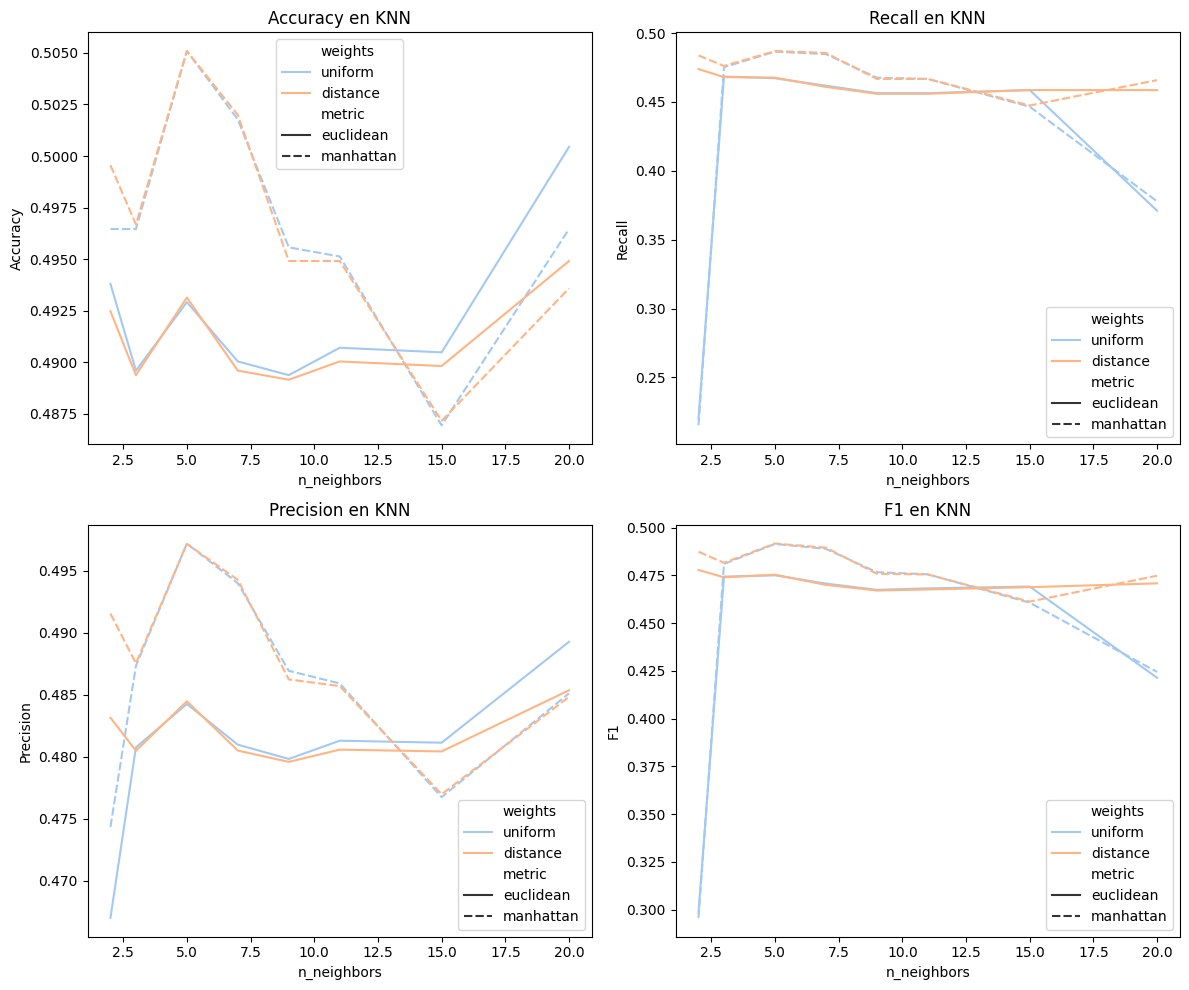

In [60]:
graphics('n_neighbors', 'weights', 'metric',  results_knn, 'KNN')

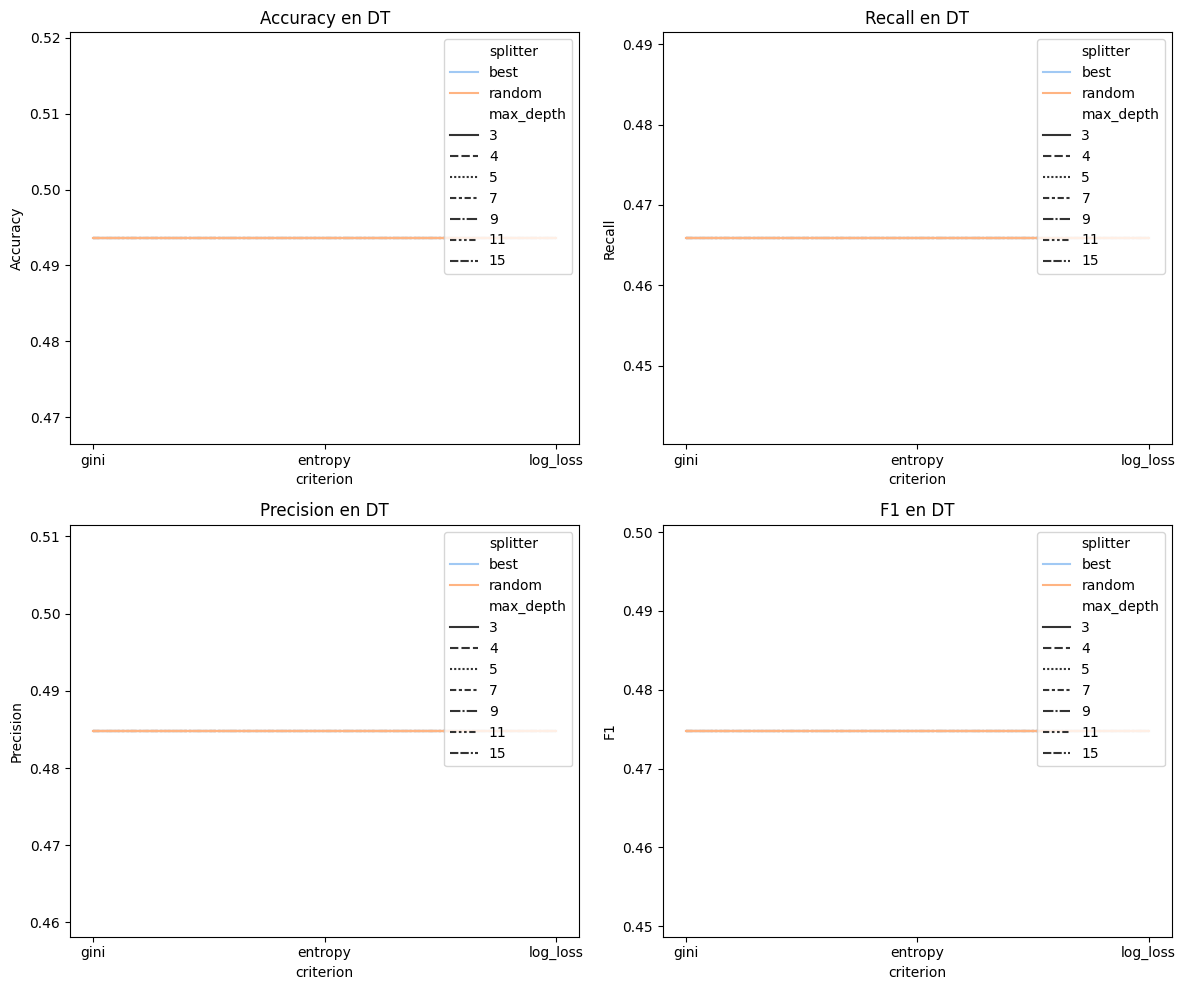

In [61]:
graphics('criterion', 'splitter', 'max_depth',  results_dt, 'DT')

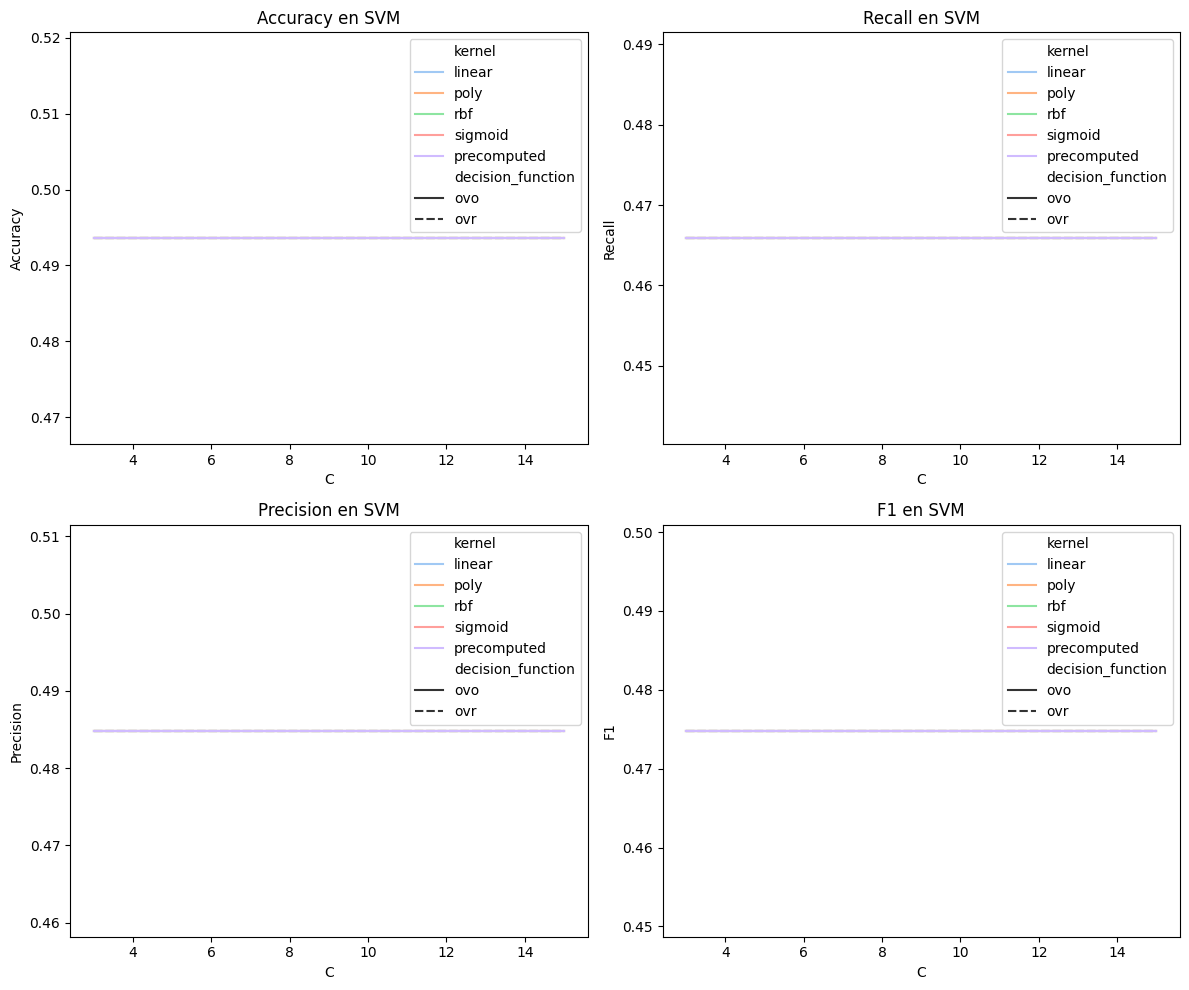

In [62]:
graphics('C', 'kernel', 'decision_function',  results_svm, 'SVM')

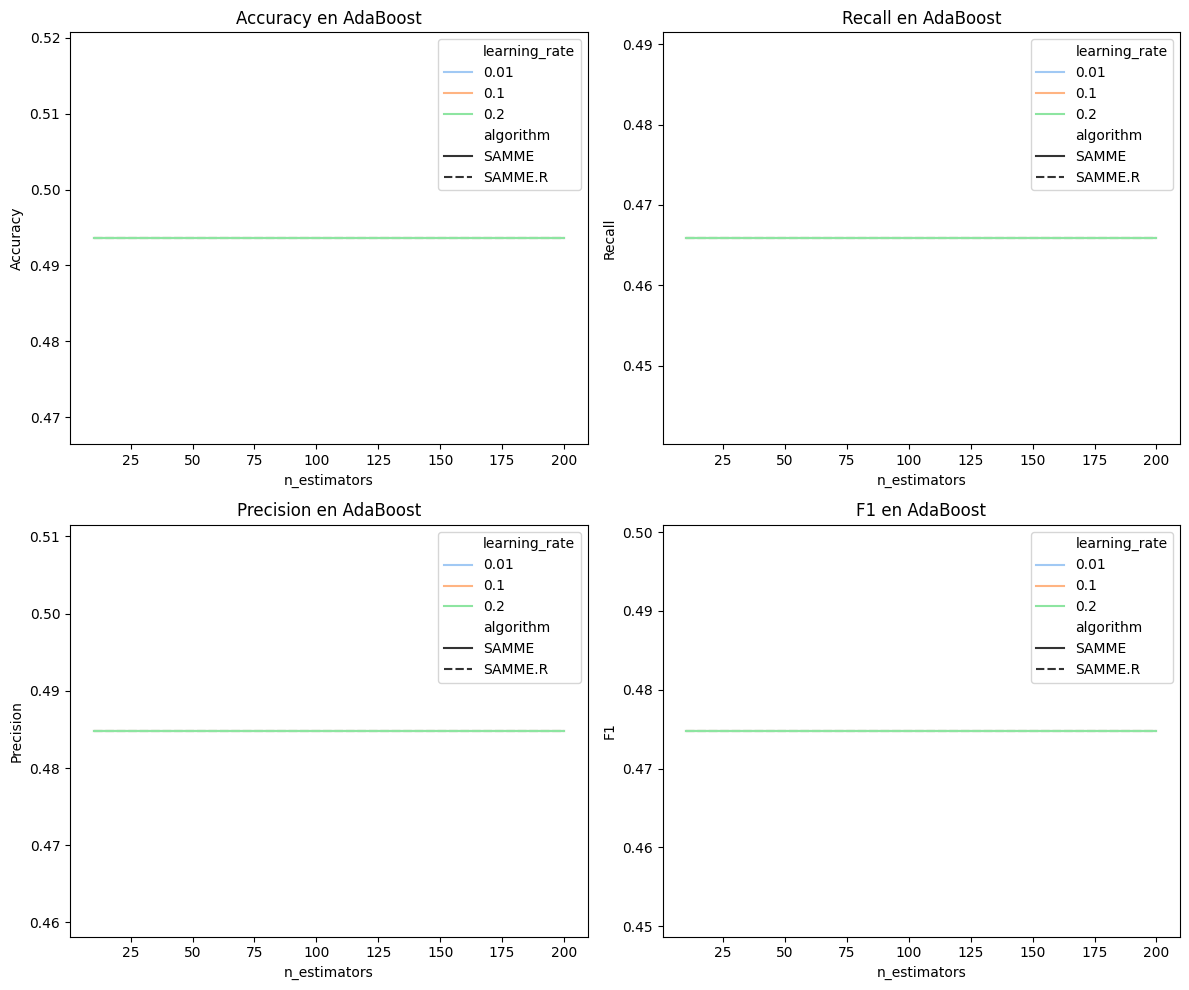

In [63]:
graphics('n_estimators', 'learning_rate', 'algorithm',  results_ada, 'AdaBoost')

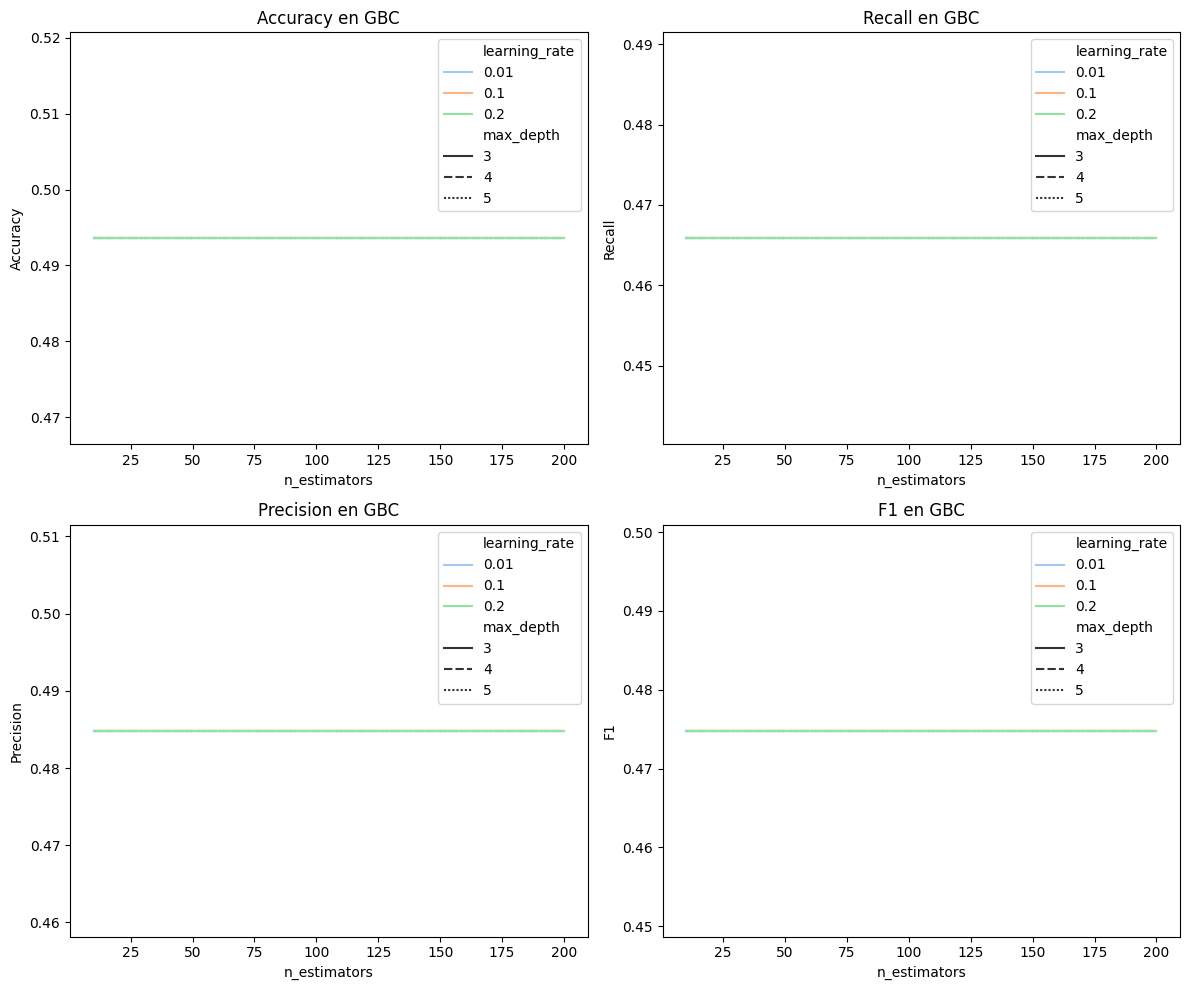

In [64]:
graphics('n_estimators', 'learning_rate', 'max_depth',  results_gbc, 'GBC')

In [ ]:
graphics('n_estimators', 'learning_rate', 'max_depth',  results_gbc, 'GBC')

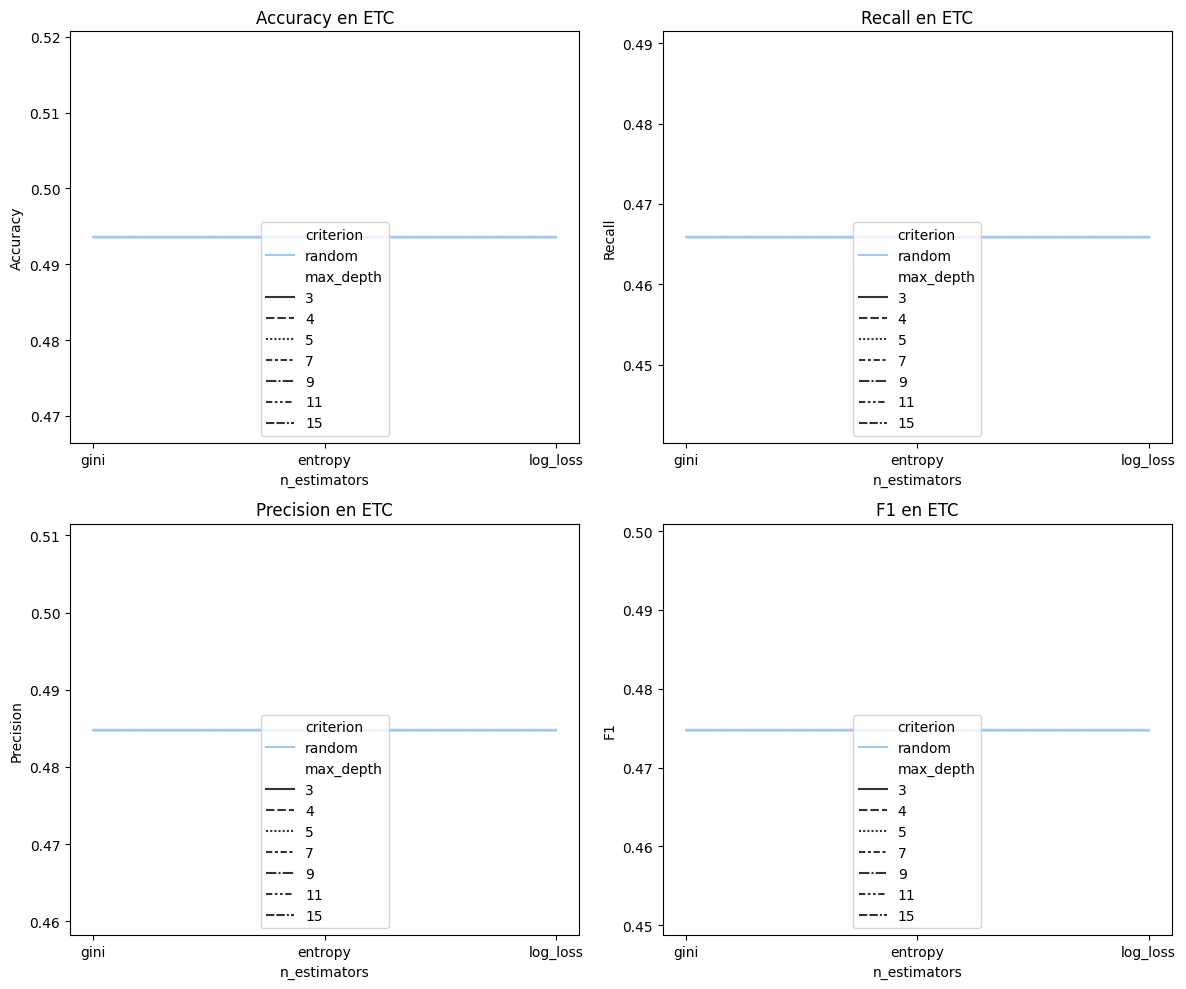

In [65]:
graphics('n_estimators', 'criterion', 'max_depth',  results_etc, 'ETC')